# My Analysis on Profitable App Profiles for the App Store and Google Play Markets
<p> <img src= "https://th.bing.com/th/id/R.a596c49ca2cc35b17afb8f7bb409d6e9?rik=FEj0zMShEH1Dmg&riu=http%3a%2f%2fwww.androidblogg.com%2fwp-content%2fuploads%2f2020%2f05%2fstore.png&ehk=DxTAb1otCmYQT6SjtlNtOqZqIBUus28lxDLpZEYRmqo%3d&risl=&pid=ImgRaw&r=0"></p>

## The goal for this project is to analyze data and find mobile app profiles that are profitable for the App Store and Google Play markets and likely to attract more users.

## I'm going to use two data sets for this project:
* [A dataset](https://www.kaggle.com/lava18/google-play-store-apps) containing data of about 10,000 Apps from Google Play; the data was collected in August 2018. The data can be found on [Here]( https://www.kaggle.com/lava18/google-play-store-apps), on Kaggle.

* [A dataset](https://www.kaggle.com/datasets/ramamet4/app-store-apple-data-set-10k-apps) containing data of about 7,000 Apps from App Store; the data was collected in August 2018. The data can be found on [Here]( https://www.kaggle.com/lava18/google-play-store-apps), on Kaggle.


# I Start by opening the two data sets

In [23]:
file = open("AppleStore.csv", encoding='utf8')
from csv import reader
read_file = reader(file)
Applestore_data = list(read_file)

file = open("googleplaystore.csv", encoding='utf8')
from csv import reader
read_file = reader(file)
Playstore_data = list(read_file)

## In the cell below I define a function named explore_data() that can be used repeatedly to explore rows in a more readable way, and i also added a feature to show the number of rows and columns for any data set.

In [24]:
def explore_data(dataset, start, end, rows_and_columns=False):
    dataset_slice = dataset[start:end]    
    for row in dataset_slice:
        print(row)
        print('\n')

    if rows_and_columns:
        print('Number of rows:', len(dataset))
        print('Number of columns:', len(dataset[0]))

## Using the function to Explore the Data

In [25]:
print(Playstore_data[0])#Prints the header row from the dataset
print("\n")
explore_data(Playstore_data, 1,3,True)

['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type', 'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver', 'Android Ver']


['Photo Editor & Candy Camera & Grid & ScrapBook', 'ART_AND_DESIGN', '4.1', '159', '19M', '10,000+', 'Free', '0', 'Everyone', 'Art & Design', 'January 7, 2018', '1.0.0', '4.0.3 and up']


['Coloring book moana', 'ART_AND_DESIGN', '3.9', '967', '14M', '500,000+', 'Free', '0', 'Everyone', 'Art & Design;Pretend Play', 'January 15, 2018', '2.0.0', '4.0.3 and up']


Number of rows: 10842
Number of columns: 13


In [26]:
print(Applestore_data[0])#Prints the header row from the dataset
print("\n")
explore_data(Applestore_data, 1,3,True)

['id', 'track_name', 'size_bytes', 'currency', 'price', 'rating_count_tot', 'rating_count_ver', 'user_rating', 'user_rating_ver', 'ver', 'cont_rating', 'prime_genre', 'sup_devices.num', 'ipadSc_urls.num', 'lang.num', 'vpp_lic']


['284882215', 'Facebook', '389879808', 'USD', '0.0', '2974676', '212', '3.5', '3.5', '95.0', '4+', 'Social Networking', '37', '1', '29', '1']


['389801252', 'Instagram', '113954816', 'USD', '0.0', '2161558', '1289', '4.5', '4.0', '10.23', '12+', 'Photo & Video', '37', '0', '29', '1']


Number of rows: 7198
Number of columns: 16


# Data Cleansing
<p> <img src ="https://www.expertcallers.com/blog/wp-content/uploads/2020/04/data-cleansing-services.jpg" width = "80%" align="center"></p>

On going through the Google Play data set dedicated discussion section, an error for row 10472, which is row 10473 in the data set, was outlined in one of the discussions.

In [27]:
print(len(Playstore_data[10473]))
print(len(Playstore_data[10500]))

12
13


In the cell above i compared the length of row 10473 with another row to see the difference between the lengths.

Below I'm now using a built in function `del()`, to delete that incomplete row.

In [28]:
del(Playstore_data[10473])
print (len(Playstore_data))


10841


From exploring the data i also noticed that some apps have some duplicate entries in the `Playstore_data`<br>
Example Below:

In [29]:
for rows in Playstore_data:
    if rows[0] == "Google My Business":
        print (rows)

['Google My Business', 'BUSINESS', '4.4', '70991', 'Varies with device', '5,000,000+', 'Free', '0', 'Everyone', 'Business', 'July 24, 2018', '2.19.0.204537701', '4.4 and up']
['Google My Business', 'BUSINESS', '4.4', '70991', 'Varies with device', '5,000,000+', 'Free', '0', 'Everyone', 'Business', 'July 24, 2018', '2.19.0.204537701', '4.4 and up']
['Google My Business', 'BUSINESS', '4.4', '70991', 'Varies with device', '5,000,000+', 'Free', '0', 'Everyone', 'Business', 'July 24, 2018', '2.19.0.204537701', '4.4 and up']


I don't want to count certain apps more than once when analyzing the data, So im removing the duplicate entries and keeping only one entry per app.
But rather than removing duplicates randomly, I'll keep only the row with the highest number of review.
 _The higher the number of reviews, the more recent the data should be._

# Removing Duplicate apps

In [30]:
duplicate_apps = []
unique_apps = []
for row in Playstore_data[1:]:
    x = row[0]
    if x in unique_apps:
        duplicate_apps.append(x)
    else:
        unique_apps.append(x)
print(len(duplicate_apps))
print(len(unique_apps))

1181
9659


In [31]:
print(duplicate_apps[:3])

['Quick PDF Scanner + OCR FREE', 'Box', 'Google My Business']


In [32]:
reviews_max = {}
for rows in Playstore_data[1:]:
    names = rows[0]
    n_reviews = float(rows[3])
    if names in reviews_max and reviews_max[names] < n_reviews:
        reviews_max[names] = n_reviews
    elif names not in reviews_max:
        reviews_max[names] = n_reviews
print(len(reviews_max))
# print(reviews_max)

9659


In [33]:
android_clean = []
already_added = []

for rows in Playstore_data[1:]:
    name = rows[0]
    n_reviews = float(rows[3])
    if n_reviews == reviews_max[name] and name not in already_added:
        android_clean.append(rows)
        already_added.append(name)

In [34]:
explore_data(android_clean, 0, 3, True)

['Photo Editor & Candy Camera & Grid & ScrapBook', 'ART_AND_DESIGN', '4.1', '159', '19M', '10,000+', 'Free', '0', 'Everyone', 'Art & Design', 'January 7, 2018', '1.0.0', '4.0.3 and up']


['U Launcher Lite – FREE Live Cool Themes, Hide Apps', 'ART_AND_DESIGN', '4.7', '87510', '8.7M', '5,000,000+', 'Free', '0', 'Everyone', 'Art & Design', 'August 1, 2018', '1.2.4', '4.0.3 and up']


['Sketch - Draw & Paint', 'ART_AND_DESIGN', '4.5', '215644', '25M', '50,000,000+', 'Free', '0', 'Teen', 'Art & Design', 'June 8, 2018', 'Varies with device', '4.2 and up']


Number of rows: 9659
Number of columns: 13


## After removing the duplicates from the Playstore_data, im left with **9659 rows** and **13 Column** in the **android_clean** dataset.

From exploring the both dataset android_clean and Applestore_data, i also noticed that there are some Non-English apps with names that suggest they are not designed for an English-speaking audience. But the analysis is only the only apps that are designed for an English-speaking audience, so I am removing them.

English text usually includes letters from the English alphabet, numbers composed of digits from 0 to 9, punctuation marks (., !, ?, ;, etc.), and other symbols (+, *, /, etc.).<br>
All these characters that are specific to English texts are encoded using the ASCII standard. Each ASCII character has a corresponding number between 0 and 127 associated with it.
So im using that advantage to build a function `is_eng()` that checks an app name and tells us whether it contains non-ASCII characters.

To minimize the impact of data loss, i'll tune the function to only remove an app if its name has more than three characters with corresponding numbers falling outside the ASCII range. 
<br>
This means all English apps with up to three emoji or other special characters will still be labeled as English. The function is still not perfect, but it should be fairly effective.

In [35]:
def is_eng(x):
    x = str(x)
    z = 0
    for y in x:
        if ord(y) > 127:
            z += 1
    if z > 3:
        return False
    else:
        return True
    

In [36]:
print(is_eng('Docs To Go™ Free Office Suite'))

True


In the cell below, i am now using the `is_eng()` function to filter out the non-English apps for both data sets.

In [37]:
English_apps_android = []
for row in android_clean:
    name = row[0]
    if is_eng(name):
        English_apps_android.append(row)
print(len(English_apps_android))

9614


In [38]:
English_apps_apple = []
for row in Applestore_data[1:]:
    name = row[1]
    if is_eng(name):
        English_apps_apple.append(row)
print(len(English_apps_apple))

6183


### After filtering out the Non-English apps, I'm now Left with 9614 Android apps and 6183 iOS Apps

 These datasets still have to go through one more layer of filtering because the datasets contain both free and non-free apps; and for the analysis, i'll need to isolate only the free apps. That will be the last step in the data cleaning process.

In [39]:
Free_Eng_android = []
for row in English_apps_android:
    price = row[7]
    if price == "0.0" or price == "0":
        Free_Eng_android.append(row)
print(len(Free_Eng_android))
    

8864


In [40]:
Free_Eng_apple = []
for row in English_apps_apple:
    price = row[4]
    if price == "0.0" or price == "0":
        Free_Eng_apple.append(row)
print(len(Free_Eng_apple))
    

3222


## So far in the Data Cleaning process, i have been able to:

* Remove inaccurate data
* Remove duplicate app entries
* Remove non-English apps
* Isolate the Free Apps
<br>

Which leaves me with **_8864_ Android apps** and **_3222_ iOS apps**, which should be enough for the analysis.

 <img src ="https://th.bing.com/th/id/OIP.Hhhcsrwe6mvnWqvOjelUqgHaEK?pid=ImgDet&rs=1" align ="center" width ="80%">

###  _The aim of this analysis is to determine the kinds of apps that are likely to attract more users both in the App Store and Google Playstore._

# PHASE 1 
## Most Common Apps by Genre

I begin the analysis by getting a sense of the most common genres for each market, that is; app categories that are popular on both markets.

For that im going to need to build two functions that will be used to analyze the Data sets:

* The function `freq_table()` that will generate frequency tables of any column in the dataset.
* Another function `display_table` that will be used to display the percentages in a descending order.

In [41]:
#Creates the Frequency Table
def freq_table(dataset,column):
    frequency_table = {}
    total = 0
    for row in dataset:
        total +=1
        x = row[column]
        if x in frequency_table:
            frequency_table[x] += 1
        else:
            frequency_table[x] = 1
    table_percentages = {}
    for key in frequency_table:
        percentage = (frequency_table[key] / total) * 100
        table_percentages[key] = percentage 
    
    return table_percentages
            
#Displays the table in Descending Order
def display_table(dataset, index):
    table = freq_table(dataset, index)
    table_display = []
    for key in table:
        key_val_as_tuple = (table[key], key)
        table_display.append(key_val_as_tuple)

    table_sorted = sorted(table_display, reverse = True)
    from prettytable import PrettyTable

    myTable = PrettyTable(["GENRE",  "Frequency(%)"])
 
    for rows in table_sorted:
        myTable.add_row([rows[1],rows[0]])
    return myTable
    

I am now generating a frequency table for the prime_genre column of the App Store Data set using the function `freq_table` i defined above.

In [42]:
table = freq_table(Free_Eng_apple,11)
print(table)


{'Social Networking': 3.2898820608317814, 'Photo & Video': 4.9658597144630665, 'Games': 58.16263190564867, 'Music': 2.0484171322160147, 'Reference': 0.5586592178770949, 'Health & Fitness': 2.0173805090006205, 'Weather': 0.8690254500310366, 'Utilities': 2.5139664804469275, 'Travel': 1.2414649286157666, 'Shopping': 2.60707635009311, 'News': 1.3345747982619491, 'Navigation': 0.186219739292365, 'Lifestyle': 1.5828677839851024, 'Entertainment': 7.883302296710118, 'Food & Drink': 0.8069522036002483, 'Sports': 2.1415270018621975, 'Book': 0.4345127250155183, 'Finance': 1.1173184357541899, 'Education': 3.662321539416512, 'Productivity': 1.7380509000620732, 'Business': 0.5276225946617008, 'Catalogs': 0.12414649286157665, 'Medical': 0.186219739292365}


The display_table function will now be used to display them in descending order.

In [43]:

print(display_table(Free_Eng_apple,11))

+-------------------+---------------------+
|       GENRE       |     Frequency(%)    |
+-------------------+---------------------+
|       Games       |  58.16263190564867  |
|   Entertainment   |  7.883302296710118  |
|   Photo & Video   |  4.9658597144630665 |
|     Education     |  3.662321539416512  |
| Social Networking |  3.2898820608317814 |
|      Shopping     |   2.60707635009311  |
|     Utilities     |  2.5139664804469275 |
|       Sports      |  2.1415270018621975 |
|       Music       |  2.0484171322160147 |
|  Health & Fitness |  2.0173805090006205 |
|    Productivity   |  1.7380509000620732 |
|     Lifestyle     |  1.5828677839851024 |
|        News       |  1.3345747982619491 |
|       Travel      |  1.2414649286157666 |
|      Finance      |  1.1173184357541899 |
|      Weather      |  0.8690254500310366 |
|    Food & Drink   |  0.8069522036002483 |
|     Reference     |  0.5586592178770949 |
|      Business     |  0.5276225946617008 |
|        Book       |  0.4345127

To get a clearer picture,
The frequency table will now be used to plot a Bar Chart

Matplotlib is building the font cache; this may take a moment.


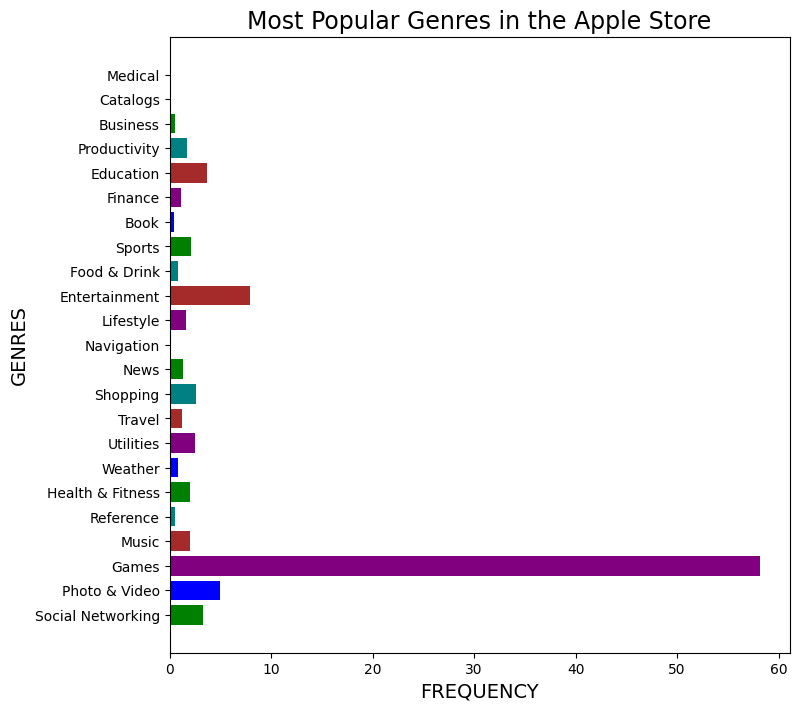

In [44]:
labels =[]
sizes = []
small_label = "others"
sizes_small = 0
for x,y in table.items():
    labels.append(x)
    sizes.append(y)
import matplotlib.pyplot as plt
%matplotlib inline
Colors = ['green','blue','purple','brown','teal']
plt.figure(figsize=(8,8))
plt.barh(labels,sizes, color=Colors)
plt.title('Most Popular Genres in the Apple Store', fontsize=17)
plt.xlabel('FREQUENCY', fontsize=14)
plt.ylabel('GENRES', fontsize=14)
#plt.xticks(fontsize=30)
plt.show()

From this it can be seen that among the free English apps, more than a half (58.1%) are games. Entertainment apps are close to 8%, followed by photo and video apps, which amount for close to 5% of the apps in our data set.
The general impression is that the App Store (at least the part containing free English apps) is dominated by apps that are designed for fun (games, entertainment, photo and video, social networking, sports, music, etc.), while apps with practical purposes (education, shopping, utilities, productivity, lifestyle, etc.) are more rare. 
However, the fact that fun apps are the most numerous doesn't also imply that they also have the greatest number of users — _The demand might not be the same as the Supply._


Repeating the same process for the Category column of the Google Play data set.

In [45]:
table = freq_table(Free_Eng_android,1)
print(display_table(Free_Eng_android,1))


+---------------------+--------------------+
|        GENRE        |    Frequency(%)    |
+---------------------+--------------------+
|        FAMILY       | 18.907942238267147 |
|         GAME        | 9.724729241877256  |
|        TOOLS        | 8.461191335740072  |
|       BUSINESS      | 4.591606498194946  |
|      LIFESTYLE      | 3.9034296028880866 |
|     PRODUCTIVITY    | 3.892148014440433  |
|       FINANCE       | 3.7003610108303246 |
|       MEDICAL       | 3.531137184115524  |
|        SPORTS       | 3.395758122743682  |
|   PERSONALIZATION   | 3.3167870036101084 |
|    COMMUNICATION    | 3.2378158844765346 |
|  HEALTH_AND_FITNESS | 3.0798736462093865 |
|     PHOTOGRAPHY     | 2.944494584837545  |
|  NEWS_AND_MAGAZINES | 2.7978339350180503 |
|        SOCIAL       | 2.6624548736462095 |
|   TRAVEL_AND_LOCAL  |  2.33528880866426  |
|       SHOPPING      | 2.2450361010830324 |
| BOOKS_AND_REFERENCE | 2.1435018050541514 |
|        DATING       | 1.861462093862816  |
|    VIDEO

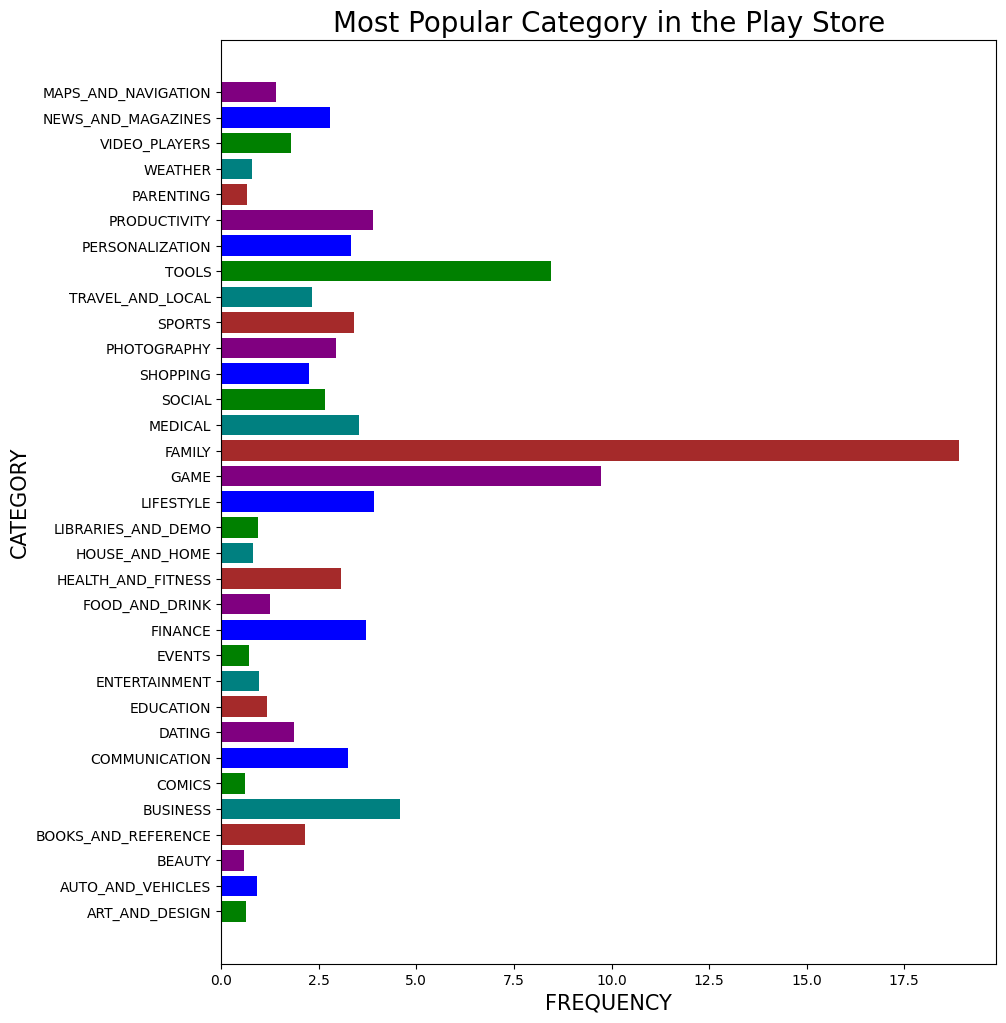

In [46]:
labels =[]
sizes = []
for x,y in table.items():
    labels.append(x)
    sizes.append(y)
Colors = ['green','blue','purple','brown','teal']
plt.figure(figsize=(10,12))
plt.barh(labels,sizes, color=Colors,align='center',)
plt.title('Most Popular Category in the Play Store', fontsize=20)
plt.xlabel('FREQUENCY', fontsize=15)
plt.ylabel('CATEGORY', fontsize=15)
#plt.xticks(rotation=90,fontsize=9)
plt.show()

Things seem significantly different on Google Play Store: there are not that many apps designed for fun, A good number of apps are designed for practical purposes (family, tools, business, lifestyle, productivity, etc.).

Now, inspecting the Genre Column of the Google Play Store dataset which seem to be related to the Category Column.


In [47]:
print(display_table(Free_Eng_android,-4))


+---------------------------------------+----------------------+
|                 GENRE                 |     Frequency(%)     |
+---------------------------------------+----------------------+
|                 Tools                 |  8.449909747292418   |
|             Entertainment             |  6.069494584837545   |
|               Education               |  5.347472924187725   |
|                Business               |  4.591606498194946   |
|              Productivity             |  3.892148014440433   |
|               Lifestyle               |  3.892148014440433   |
|                Finance                |  3.7003610108303246  |
|                Medical                |  3.531137184115524   |
|                 Sports                |  3.463447653429603   |
|            Personalization            |  3.3167870036101084  |
|             Communication             |  3.2378158844765346  |
|                 Action                |  3.1024368231046933  |
|            Health & Fit

There's no clear difference between the Genres and the Category columns of the Play Store Dataset, but one thing is that the Genres column is more granular and has more categories than the Categories Columns. <br>
But because Im looking for the bigger picture at the moment, I'll only work with the Category column moving forward.

### _Up to this point, its safe enough to say that the App Store is dominated by apps designed for fun, while Google Play shows a more balanced landscape of both practical and for-fun apps._  

# PHASE TWO
# Most Popular Apps by Genre

The way im going to find out what genres have the most users is to calculate the average number of installs for each app genre. <br>For the Google Play data set, this information can be found in the Installs column, but it is missing for the App Store data set. <br>As a workaround, I'll take the total number of user ratings as a proxy, which can be found in the rating_count_tot column.

I'm starting with calculating the average number of user ratings per app genre on the App Store.

In [48]:
table = freq_table(Free_Eng_apple,-5)
avg_rating = {}
for names in table:
    total = 0
    len_genre = 0
    for rows in Free_Eng_apple:
        genre_app = rows[-5]
        if genre_app == names:
            float_genre = float(rows[5])
            total += float_genre
            len_genre += 1
    avg_genre_rating = total /len_genre
    avg_rating[names]=avg_genre_rating
table_display = []
for key in avg_rating:
    key_val_as_tuple = (avg_rating[key], key)
    table_display.append(key_val_as_tuple)
    table_sorted = sorted(table_display, reverse = True)
from prettytable import PrettyTable
myTable = PrettyTable(["GENRE",  "Average Ratings"])
 
for key in table_sorted:
    myTable.add_row([key[1],key[0]])
print( myTable)

+-------------------+--------------------+
|       GENRE       |  Average Ratings   |
+-------------------+--------------------+
|     Navigation    | 86090.33333333333  |
|     Reference     | 74942.11111111111  |
| Social Networking | 71548.34905660378  |
|       Music       | 57326.530303030304 |
|      Weather      | 52279.892857142855 |
|        Book       |      39758.5       |
|    Food & Drink   | 33333.92307692308  |
|      Finance      | 31467.944444444445 |
|   Photo & Video   |    28441.54375     |
|       Travel      |      28243.8       |
|      Shopping     | 26919.690476190477 |
|  Health & Fitness | 23298.015384615384 |
|       Sports      | 23008.898550724636 |
|       Games       |  22788.6696905016  |
|        News       | 21248.023255813954 |
|    Productivity   | 21028.410714285714 |
|     Utilities     | 18684.456790123455 |
|     Lifestyle     | 16485.764705882353 |
|   Entertainment   | 14029.830708661417 |
|      Business     | 7491.117647058823  |
|     Educa

On an average, Navigation apps have the highest number of user reviews..

From exploring the apps under the navigation genre

In [49]:
for app in Free_Eng_apple:
    if app[-5] == 'Navigation':
        print(app[1], ':', app[5]) # print name and number of ratings

Waze - GPS Navigation, Maps & Real-time Traffic : 345046
Google Maps - Navigation & Transit : 154911
Geocaching® : 12811
CoPilot GPS – Car Navigation & Offline Maps : 3582
ImmobilienScout24: Real Estate Search in Germany : 187
Railway Route Search : 5


i can see that close to half a million user reviews on Google Maps and Waze have heavily influenced the average rating of this genre(Navigation).

Moving over to the second most highest rating: Reference Genre

In [50]:
for app in Free_Eng_apple:
    if app[-5] == 'Reference':
        print(app[1], ':', app[5])

Bible : 985920
Dictionary.com Dictionary & Thesaurus : 200047
Dictionary.com Dictionary & Thesaurus for iPad : 54175
Google Translate : 26786
Muslim Pro: Ramadan 2017 Prayer Times, Azan, Quran : 18418
New Furniture Mods - Pocket Wiki & Game Tools for Minecraft PC Edition : 17588
Merriam-Webster Dictionary : 16849
Night Sky : 12122
City Maps for Minecraft PE - The Best Maps for Minecraft Pocket Edition (MCPE) : 8535
LUCKY BLOCK MOD ™ for Minecraft PC Edition - The Best Pocket Wiki & Mods Installer Tools : 4693
GUNS MODS for Minecraft PC Edition - Mods Tools : 1497
Guides for Pokémon GO - Pokemon GO News and Cheats : 826
WWDC : 762
Horror Maps for Minecraft PE - Download The Scariest Maps for Minecraft Pocket Edition (MCPE) Free : 718
VPN Express : 14
Real Bike Traffic Rider Virtual Reality Glasses : 8
教えて!goo : 0
Jishokun-Japanese English Dictionary & Translator : 0


However, this genre seems to show some potential,even tho the Bible and Dictionary.com apps skewed up the average rating.<br> It fits well with the fact that the App Store is dominated by for-fun apps as seen in the First Phase of the analysis, which suggests the market might be a bit saturated with for-fun apps, which means that a practical app might have more of a chance to stand out among the huge number of apps on the App Store.

On to the next Dataset; the Google Play Dataset.
## Most Popular Apps by Genre on Google Play

For the Google Play market, data about the number of installs were given, which helps to get a clearer picture about genre popularity.

In [51]:
freq_table(Free_Eng_android, 5)

{'10,000+': 10.198555956678701,
 '5,000,000+': 6.825361010830325,
 '50,000,000+': 2.3014440433213,
 '100,000+': 11.552346570397113,
 '50,000+': 4.7721119133574,
 '1,000,000+': 15.726534296028879,
 '10,000,000+': 10.548285198555957,
 '5,000+': 4.512635379061372,
 '500,000+': 5.561823104693141,
 '1,000,000,000+': 0.22563176895306858,
 '100,000,000+': 2.1322202166064983,
 '1,000+': 8.393501805054152,
 '500,000,000+': 0.2707581227436823,
 '500+': 3.2490974729241873,
 '100+': 6.915613718411552,
 '50+': 1.917870036101083,
 '10+': 3.5424187725631766,
 '1+': 0.5076714801444043,
 '5+': 0.78971119133574,
 '0+': 0.04512635379061372,
 '0': 0.01128158844765343}

One problem with this data is that is not precise. For instance, I can't tell whether an app with 100,000+ installs has 100,000 installs or 200,000.
I'm going to leave the numbers as they are, which means that an app with 100,000+ installs has 100,000 installs, and an app with 1,000,000+ installs has 1,000,000 installs, and so on.

To compute the average number of installs for each genre (category), I will need to remove the commas and the plus characters and convert each install number to `float`. Which would be done in the loop below:

In [52]:
table = freq_table(Free_Eng_android,1)
table_2 = {}
#Remove characters from strings
for cat in table:
    total = 0
    len_category = 0
    for rows in Free_Eng_android:
        category = rows[1]
        if category == cat:
            inst = rows[5]
            inst =inst.replace("+","")
            inst =inst.replace("," ,"")
            inst = float(inst)
            total += inst
            len_category += 1
    avg_inst = total / len_category
    table_2[cat] = avg_inst
#Sorts table in Descending Order    
table_display = []
for key in table_2:
    key_val_as_tuple = (table_2[key], key)
    table_display.append(key_val_as_tuple)
    table_sorted = sorted(table_display, reverse = True)
#Displays a Fancy Table    
from prettytable import PrettyTable
myTable = PrettyTable(["GENRE",  "Frequency(%)"])
for rows in table_sorted:
    myTable.add_row([rows[1],rows[0]])
    
print(myTable)

+---------------------+--------------------+
|        GENRE        |    Frequency(%)    |
+---------------------+--------------------+
|    COMMUNICATION    | 38456119.167247385 |
|    VIDEO_PLAYERS    | 24727872.452830188 |
|        SOCIAL       | 23253652.127118643 |
|     PHOTOGRAPHY     | 17840110.40229885  |
|     PRODUCTIVITY    | 16787331.344927534 |
|         GAME        | 15588015.603248259 |
|   TRAVEL_AND_LOCAL  | 13984077.710144928 |
|    ENTERTAINMENT    | 11640705.88235294  |
|        TOOLS        | 10801391.298666667 |
|  NEWS_AND_MAGAZINES | 9549178.467741935  |
| BOOKS_AND_REFERENCE | 8767811.894736841  |
|       SHOPPING      | 7036877.311557789  |
|   PERSONALIZATION   | 5201482.6122448975 |
|       WEATHER       | 5074486.197183099  |
|  HEALTH_AND_FITNESS | 4188821.9853479853 |
| MAPS_AND_NAVIGATION | 4056941.7741935486 |
|        FAMILY       | 3695641.8198090694 |
|        SPORTS       | 3638640.1428571427 |
|    ART_AND_DESIGN   | 1986335.0877192982 |
|    FOOD_

On average, communication apps have the most installs: 38,456,119. This number is heavily skewed up by a few apps that have over one billion installs (WhatsApp, Facebook Messenger, Skype, Google Chrome, Gmail, and Hangouts), and a few others with over 100 and 500 million installs:

In [53]:
for app in Free_Eng_android:
    if app[1] == 'COMMUNICATION' and (app[5] == '1,000,000,000+'
                                      or app[5] == '500,000,000+'
                                      or app[5] == '100,000,000+'):
        print(app[0], ':', app[5])

WhatsApp Messenger : 1,000,000,000+
imo beta free calls and text : 100,000,000+
Android Messages : 100,000,000+
Google Duo - High Quality Video Calls : 500,000,000+
Messenger – Text and Video Chat for Free : 1,000,000,000+
imo free video calls and chat : 500,000,000+
Skype - free IM & video calls : 1,000,000,000+
Who : 100,000,000+
GO SMS Pro - Messenger, Free Themes, Emoji : 100,000,000+
LINE: Free Calls & Messages : 500,000,000+
Google Chrome: Fast & Secure : 1,000,000,000+
Firefox Browser fast & private : 100,000,000+
UC Browser - Fast Download Private & Secure : 500,000,000+
Gmail : 1,000,000,000+
Hangouts : 1,000,000,000+
Messenger Lite: Free Calls & Messages : 100,000,000+
Kik : 100,000,000+
KakaoTalk: Free Calls & Text : 100,000,000+
Opera Mini - fast web browser : 100,000,000+
Opera Browser: Fast and Secure : 100,000,000+
Telegram : 100,000,000+
Truecaller: Caller ID, SMS spam blocking & Dialer : 100,000,000+
UC Browser Mini -Tiny Fast Private & Secure : 100,000,000+
Viber Mess

The same pattern can be found in the **Video Players** category, which is the runner-up with 24,727,872 installs. The market is dominated by apps like Youtube, Google Play Movies & TV, or MX Player.<br> The pattern is repeated for **Social Apps** (where we have giants like Facebook, Instagram, Google+, etc.), **Photography apps** (Google Photos and other popular photo editors), or **Productivity Apps** (Microsoft Word, Dropbox, Google Calendar, Evernote, etc.).<br>
The main issue with these Genres(Category) is that these app genres might seem more popular than they really are, and these niches seem to be dominated by a few giants who are hard to compete against.<br>
The **Game** genre seems pretty popular, but this part of the market seems a bit saturated as seen in the first phase, so it's best to come up with a different app recommendation.

The **Books and Reference** genre looks fairly popular as well, with an average number of installs of 8,767,811. It's interesting to explore this in more depth, because this genre has some potential to work well on the App Store, and the aim is to recommend an app genre that shows potential for being profitable on both the App Store and Google Play.

Taking a look at some of the apps from this genre(**Books and Reference genre**) and their number of installs:

In [54]:
for app in Free_Eng_android:
    if app[1] == 'BOOKS_AND_REFERENCE':
        print(app[0], ':', app[5])

E-Book Read - Read Book for free : 50,000+
Download free book with green book : 100,000+
Wikipedia : 10,000,000+
Cool Reader : 10,000,000+
Free Panda Radio Music : 100,000+
Book store : 1,000,000+
FBReader: Favorite Book Reader : 10,000,000+
English Grammar Complete Handbook : 500,000+
Free Books - Spirit Fanfiction and Stories : 1,000,000+
Google Play Books : 1,000,000,000+
AlReader -any text book reader : 5,000,000+
Offline English Dictionary : 100,000+
Offline: English to Tagalog Dictionary : 500,000+
FamilySearch Tree : 1,000,000+
Cloud of Books : 1,000,000+
Recipes of Prophetic Medicine for free : 500,000+
ReadEra – free ebook reader : 1,000,000+
Anonymous caller detection : 10,000+
Ebook Reader : 5,000,000+
Litnet - E-books : 100,000+
Read books online : 5,000,000+
English to Urdu Dictionary : 500,000+
eBoox: book reader fb2 epub zip : 1,000,000+
English Persian Dictionary : 500,000+
Flybook : 500,000+
All Maths Formulas : 1,000,000+
Ancestry : 5,000,000+
HTC Help : 10,000,000+
E

The **Book and Reference** genre includes a variety of apps: software for processing and reading ebooks, various collections of libraries, dictionaries, etc. Let me check if there are extremely popular apps that skew the average:

In [55]:
for app in Free_Eng_android:
    if app[1] == 'BOOKS_AND_REFERENCE' and (app[5] == '1,000,000,000+'
                                            or app[5] == '500,000,000+'
                                            or app[5] == '100,000,000+'):
        print(app[0], ':', app[5])

Google Play Books : 1,000,000,000+
Bible : 100,000,000+
Amazon Kindle : 100,000,000+
Wattpad 📖 Free Books : 100,000,000+
Audiobooks from Audible : 100,000,000+


However, it looks like there is only one very popular app "Google Play Books" which has over a billion installs, so this market still shows potential.<br> In the cell below, im trying get some app ideas based on the kind of apps that are somewhere in the middle in terms of popularity that is; between 1,000,000 and 100,000,000 downloads):

In [56]:
for app in Free_Eng_android:
    if app[1] == 'BOOKS_AND_REFERENCE' and (app[5] == '1,000,000+'
                                            or app[5] == '5,000,000+'
                                            or app[5] == '10,000,000+'
                                            or app[5] == '50,000,000+'):
        print(app[0], ':', app[5])

Wikipedia : 10,000,000+
Cool Reader : 10,000,000+
Book store : 1,000,000+
FBReader: Favorite Book Reader : 10,000,000+
Free Books - Spirit Fanfiction and Stories : 1,000,000+
AlReader -any text book reader : 5,000,000+
FamilySearch Tree : 1,000,000+
Cloud of Books : 1,000,000+
ReadEra – free ebook reader : 1,000,000+
Ebook Reader : 5,000,000+
Read books online : 5,000,000+
eBoox: book reader fb2 epub zip : 1,000,000+
All Maths Formulas : 1,000,000+
Ancestry : 5,000,000+
HTC Help : 10,000,000+
Moon+ Reader : 10,000,000+
English-Myanmar Dictionary : 1,000,000+
Golden Dictionary (EN-AR) : 1,000,000+
All Language Translator Free : 1,000,000+
Aldiko Book Reader : 10,000,000+
Dictionary - WordWeb : 5,000,000+
50000 Free eBooks & Free AudioBooks : 5,000,000+
Al-Quran (Free) : 10,000,000+
Al Quran Indonesia : 10,000,000+
Al'Quran Bahasa Indonesia : 10,000,000+
Al Quran Al karim : 1,000,000+
Al Quran : EAlim - Translations & MP3 Offline : 5,000,000+
Koran Read &MP3 30 Juz Offline : 1,000,000+
H

From the Output above,this Genre(Category) seems to be dominated by software for processing and reading ebooks, as well as various collections of libraries and dictionaries, so it's probably not a good idea to build similar apps since there'll be some significant competition.

But i also noticed that there are quite a few apps built around the book Quran, which implies that building an app around a popular book can be profitable.

# CONCLUSION

In this project, I analyzed data about the App Store and Google Play mobile apps to recommend an app profile that can be profitable for both markets, and I have been able to conclude that:

**Taking a popular book (perhaps a more recent book) and turning it into an app could be profitable for both the Google Play and the App Store markets**, but these markets are already full of libraries so some special features may need to be added to the app besides the raw version of the book, which might include daily quotes from the book, an audio version of the book, quizzes on the book, or a forum where people can discuss the book, etc.